### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [66]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [80]:
df = pd.read_csv('cleaned_df.csv', index_col = 'Unnamed: 0')

In [81]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,NaN,2019-03-17,NaN,-1.00
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,NaN,2018-05-21,NaN,-1.00
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,NaN,2019-03-18,NaN,-1.00
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days 00:00:00.000000000,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days 00:00:00.000000000,13.01


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16791
Data columns (total 19 columns):
Name                   12450 non-null object
Type                   16457 non-null object
Breed                  16457 non-null object
Color                  16457 non-null object
Sex                    16457 non-null object
Size                   16457 non-null object
Animal ID              16457 non-null object
Days in Shelter        16457 non-null int64
Intake Type            16457 non-null object
Intake Subtype         16457 non-null object
Outcome Type           16457 non-null object
Intake Condition       16457 non-null object
Intake Jurisdiction    16457 non-null object
PredomBreed            16457 non-null object
PredomColor            16457 non-null object
DOB                    12680 non-null object
IntakeDate             16457 non-null object
IntakeAge              12680 non-null object
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(1), object

In [83]:
df.describe()

,Days in Shelter,IntakeAgeYrs
count,16457.000000,16457.000000
mean,17.153734,2.415546
std,28.458548,3.880925
min,0.000000,-1.000000
25%,1.000000,0.080000
50%,9.000000,0.950000
75%,22.000000,3.770000
max,791.000000,25.950000


In [84]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Animal ID',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'DOB', 'IntakeDate', 'IntakeAge', 'IntakeAgeYrs'],
      dtype='object')

# Feature Engineering

In [85]:
df.drop(['Name','Breed','Color','Animal ID','DOB','IntakeDate','IntakeAge'], axis=1, inplace=True)

In [86]:
df.head()

,Type,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,IntakeAgeYrs
0,OTHER,Unknown,SMALL,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,-1.00
1,CAT,Female,SMALL,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,-1.00
2,OTHER,Unknown,SMALL,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,-1.00
3,CAT,Spayed,MED,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,8.01
4,CAT,Female,SMALL,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,13.01


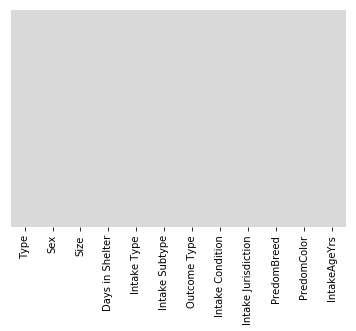

In [87]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [89]:
df.reset_index(drop=True, inplace=True)

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [43]:
from collections import defaultdict

In [44]:
d = defaultdict(LabelEncoder)

In [90]:
# Encoding the variable
fit = df.drop(['Days in Shelter', 'IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
encoded = df.drop(['Days in Shelter', 'IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].transform(x))

In [91]:
modeling = pd.concat([encoded, df[['Days in Shelter', 'IntakeAgeYrs']].copy()], axis=1)

In [92]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 12 columns):
Type                   16457 non-null int64
Sex                    16457 non-null int64
Size                   16457 non-null int64
Intake Type            16457 non-null int64
Intake Subtype         16457 non-null int64
Outcome Type           16457 non-null int64
Intake Condition       16457 non-null int64
Intake Jurisdiction    16457 non-null int64
PredomBreed            16457 non-null int64
PredomColor            16457 non-null int64
Days in Shelter        16457 non-null int64
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(11)
memory usage: 1.5 MB


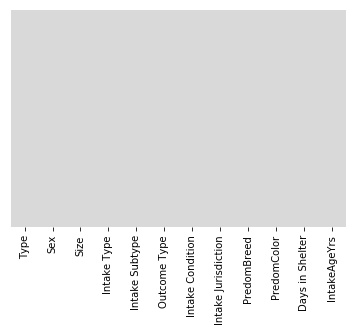

In [93]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

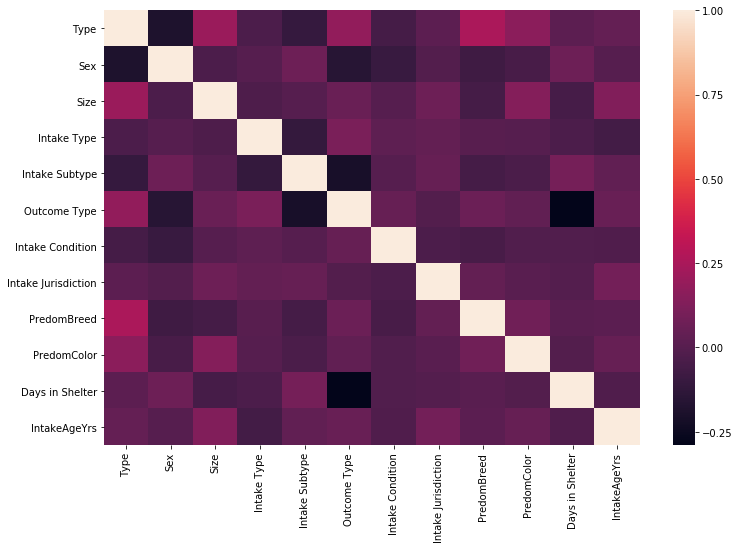

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(modeling.corr())

## Interaction Features

In [95]:
features = modeling.drop(['Outcome Type'], axis = 1).copy()

In [96]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [97]:
features = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(input_features=features.columns))

In [98]:
features.describe()

,Type,Sex,Size,Intake Type,Intake Subtype,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,Days in Shelter,IntakeAgeYrs,Type Sex,Type Size,Type Intake Type,Type Intake Subtype,Type Intake Condition,Type Intake Jurisdiction,Type PredomBreed,Type PredomColor,Type Days in Shelter,Type IntakeAgeYrs,Sex Size,Sex Intake Type,Sex Intake Subtype,Sex Intake Condition,Sex Intake Jurisdiction,Sex PredomBreed,Sex PredomColor,Sex Days in Shelter,Sex IntakeAgeYrs,Size Intake Type,Size Intake Subtype,Size Intake Condition,Size Intake Jurisdiction,Size PredomBreed,Size PredomColor,Size Days in Shelter,Size IntakeAgeYrs,Intake Type Intake Subtype,Intake Type Intake Condition,Intake Type Intake Jurisdiction,Intake Type PredomBreed,Intake Type PredomColor,Intake Type Days in Shelter,Intake Type IntakeAgeYrs,Intake Subtype Intake Condition,Intake Subtype Intake Jurisdiction,Intake Subtype PredomBreed,Intake Subtype PredomColor,Intake Subtype Days in Shelter,Intake Subtype IntakeAgeYrs,Intake Condition Intake Jurisdiction,Intake Condition PredomBreed,Intake Condition PredomColor,Intake Condition Days in Shelter,Intake Condition IntakeAgeYrs,Intake Jurisdiction PredomBreed,Intake Jurisdiction PredomColor,Intake Jurisdiction Days in Shelter,Intake Jurisdiction IntakeAgeYrs,PredomBreed PredomColor,PredomBreed Days in Shelter,PredomBreed IntakeAgeYrs,PredomColor Days in Shelter,PredomColor IntakeAgeYrs,Days in Shelter IntakeAgeYrs
count,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000
mean,0.722428,2.066962,2.513642,3.445342,7.663669,1.068117,9.143890,28.010026,6.928055,17.153734,2.415546,1.369630,2.020781,2.468858,5.157562,0.725345,6.621134,22.158656,5.668955,12.764781,1.844763,5.139697,7.123169,16.312876,2.050252,18.881570,56.859877,13.967977,37.770493,5.000982,8.614814,19.270462,2.685544,23.145531,69.260254,19.044601,40.846934,6.930347,25.645500,3.721638,31.566628,96.605092,23.856171,58.089992,8.073169,8.194203,70.529015,210.229993,51.600352,148.301209,19.399173,9.706629,29.079298,7.235280,17.641733,2.473777,256.825545,63.462843,156.701221,22.577950,201.205505,484.568330,68.294930,117.114784,18.054690,39.312790
std,0.592350,1.114992,1.666012,1.100699,6.176820,1.458522,1.397513,12.599100,7.044173,28.458548,3.880925,1.627586,2.284181,2.279326,7.098868,1.590652,5.534907,22.744486,8.642696,30.394968,3.583111,4.898346,4.669493,16.942358,3.674428,10.631307,40.974095,17.684853,72.623370,8.938926,6.631386,23.340894,4.870514,15.996020,56.944013,25.636332,78.661077,13.791375,25.467052,5.384385,11.219241,55.115894,26.664185,108.437993,14.159105,15.444557,58.740851,206.177930,79.160656,365.929639,41.908642,13.459828,45.499117,15.909841,49.505969,8.901735,124.665166,66.058703,262.542082,36.925305,249.102307,945.506308,121.387912,297.817631,44.430499,148.680134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [99]:
modeling = pd.concat([features, modeling['Outcome Type']],axis=1)

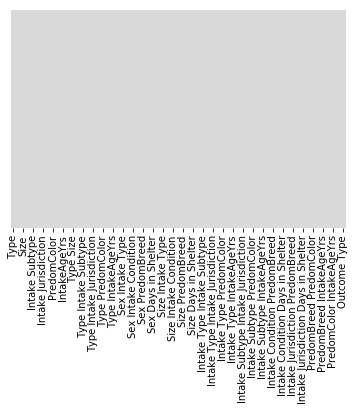

In [100]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [101]:
modeling.to_csv('encoded_data.csv')

# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(modeling.drop('Outcome Type', axis=1), modeling['Outcome Type'], test_size=0.2, random_state=42)

# Over Sampling with SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [103]:
sm = SMOTE(sampling_strategy='not majority', random_state=23, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [105]:
unique_elements, counts_elements = np.unique(y_train_sm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3]
 [4495 4495 4495 4495]]
